Analyse Klausur Ergebnisse

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
£ tryinggg

In [ ]:
lol

In [ ]:
kurztest_df = pd.read_excel("kl_ergebnisse.xlsx", sheet_name="Kurztests")

In [ ]:
kurztest_df.columns

Index(['Ergebnisse aller Kurztests (1-13)', 'Unnamed: 1'], dtype='object')

In [ ]:
new_header = kurztest_df.iloc[0]  # Grab the first row for the header
kurztest_df = kurztest_df[1:]  # Take the data less the header row
kurztest_df.columns = new_header  # Set the header row as the df header

# Step 2: Optionally, reset the index of the DataFrame
kurztest_df.reset_index(drop=True, inplace=True)


In [ ]:
kurztest_df

,Ergebnisse aller Kurztests (1-13),Unnamed: 1
0,Last 4 digits,Bewertung
1,7793,0.846154
2,7793,0.166667
3,7793,0.5
4,7793,0
...,...,...
815,1111,0.615385
816,1111,0.5
817,1111,0.722222
818,1111,0.666667


In [ ]:
kurztest_df.rename(columns={'Last 4 digits': 'ID'}, inplace=True)


<ipython-input-53-9b64c30d5100>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kurztest_df.rename(columns={'Last 4 digits': 'ID'}, inplace=True)


In [ ]:
kurztest_df

,ID,Bewertung
0,7793,0.846154
1,7793,0.166667
2,7793,0.5
3,7793,0
4,4381,0.77
...,...,...
814,1111,0.615385
815,1111,0.5
816,1111,0.722222
817,1111,0.666667


In [ ]:
average_bewertung_kurztest = kurztest_df.groupby('ID')['Bewertung'].mean().reset_index()

# average_bewertung now contains each 'ID' with the average 'Bewertung'

average_bewertung_kurztest

,ID,Bewertung
0,312,0.291538
1,344,0.482872
2,346,0.365769
3,355,0.662764
4,359,0.463923
...,...,...
116,9264,0.539231
117,9307,0.450556
118,9413,0.000000
119,9447,0.347128


In [ ]:
klausur_df = pd.read_excel("kl_ergebnisse.xlsx", sheet_name="Klausur")

In [ ]:
klausur_df

,Ergebnisse der Klausur (Studenten mit mehr als 62% der Kurztests bearbeitet),Unnamed: 1,Unnamed: 2
0,Last 4 digits,Klausur Punkte,Klausur %
1,3137,87,0.90625
2,1733,95.5,0.994792
3,5486,84,0.875
4,6436,84,0.875
5,2555,85.5,0.890625
6,8200,73.5,0.765625
7,3550,69,0.71875
8,6009,65,0.677083
9,7150,65,0.677083


In [ ]:
new_header = klausur_df.iloc[0]  # Grab the first row for the header
klausur_df = klausur_df[1:]  # Take the data less the header row
klausur_df.columns = new_header  # Set the header row as the df header

# Step 2: Optionally, reset the index of the DataFrame
klausur_df.reset_index(drop=True, inplace=True)
klausur_df.rename(columns={'Last 4 digits': 'ID'}, inplace=True)

<ipython-input-60-6308c05e9b22>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  klausur_df.rename(columns={'Last 4 digits': 'ID'}, inplace=True)


In [ ]:
klausur_df

,ID,Klausur Punkte,Klausur %
0,3137,87,0.90625
1,1733,95.5,0.994792
2,5486,84,0.875
3,6436,84,0.875
4,2555,85.5,0.890625
5,8200,73.5,0.765625
6,3550,69,0.71875
7,6009,65,0.677083
8,7150,65,0.677083
9,1345,65.5,0.682292


In [ ]:
common_df = pd.merge(average_bewertung_kurztest, klausur_df, on = 'ID', how ='inner')

In [ ]:
common_df["Klausur %"] = common_df["Klausur %"] *100

In [ ]:
common_df["Bewertung"] = common_df["Bewertung"] *100

In [ ]:
common_df

,ID,Bewertung,Klausur Punkte,Klausur %
0,355,66.276353,68,70.833333
1,359,46.392308,0,0
2,399,40.125356,7.5,7.8125
3,696,64.052597,85.5,89.0625
4,891,66.712251,86,89.583333
5,1165,66.627817,79.5,82.8125
6,1264,37.822222,0.5,0.520833
7,1324,88.853276,4,4.166667
8,1345,60.641026,65.5,68.229167
9,1733,77.196581,95.5,99.479167


In [ ]:
common_df.to_excel("summary_data.xlsx", index=False, sheet_name = "Summary")

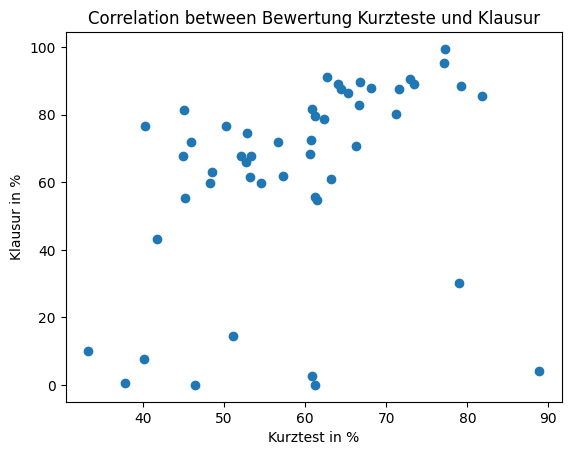

In [ ]:
plt.scatter(common_df["Bewertung"], common_df["Klausur %"])
plt.title("Correlation between Bewertung Kurzteste und Klausur")
plt.xlabel('Kurztest in %')
plt.ylabel('Klausur in %')
plt.show()

In [ ]:
# Check for non-numeric data and convert if necessary
common_df['Bewertung'] = pd.to_numeric(common_df['Bewertung'], errors='coerce')
common_df['Klausur %'] = pd.to_numeric(common_df['Klausur %'], errors='coerce')

# Drop NaN values from the DataFrame to avoid errors in correlation calculation
common_df = common_df.dropna(subset=['Bewertung', 'Klausur %'])

# Now, try calculating the correlation again
pearson_corr = common_df['Bewertung'].corr(common_df['Klausur %'], method='pearson')
print(f'Pearson correlation: {pearson_corr}')

spearman_corr = common_df['Bewertung'].corr(common_df['Klausur %'], method='spearman')
print(f'Spearman correlation: {spearman_corr}')


Pearson correlation: 0.3712615602977197
Spearman correlation: 0.547934693994782


Pearson correlation: 0.3712615602977197
Spearman correlation: 0.547934693994782
Pearson correlation: 0.3712615602977197
Spearman correlation: 0.547934693994782


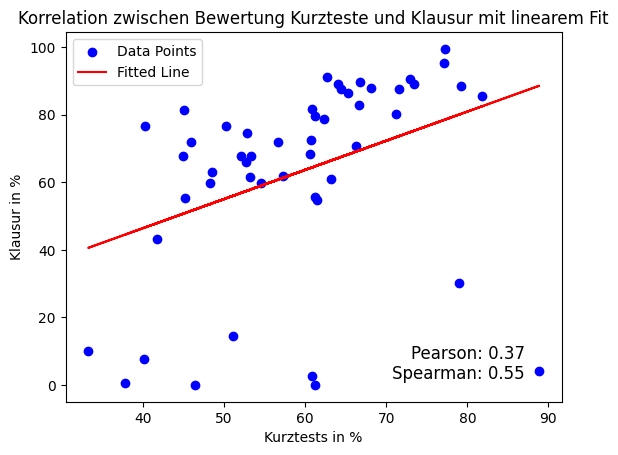

In [ ]:
coefficients = np.polyfit(common_df["Bewertung"], common_df["Klausur %"], 1)

# The coefficients are in the form of [slope, intercept]
slope, intercept = coefficients

# Calculate the best fit line's y values
y_fit = slope * common_df["Bewertung"] + intercept

# Plotting the scatter plot
plt.scatter(common_df["Bewertung"], common_df["Klausur %"], color='blue', label='Data Points')

# Plotting the linear fit line
plt.plot(common_df["Bewertung"], y_fit, color='red', label='Fitted Line')
pearson_corr = common_df['Bewertung'].corr(common_df['Klausur %'], method='pearson')
print(f'Pearson correlation: {pearson_corr}')

spearman_corr = common_df['Bewertung'].corr(common_df['Klausur %'], method='spearman')
print(f'Spearman correlation: {spearman_corr}')

xlim = plt.xlim()
ylim = plt.ylim()

text_position_x = xlim[1] * 0.95  # 95% from the left
text_position_y = ylim[0] + (ylim[1] - ylim[0]) * 0.05  # 5% above the bottom

# Print correlation values on the plot
plt.text(text_position_x, text_position_y, f'Pearson: {pearson_corr:.2f}\nSpearman: {spearman_corr:.2f}', fontsize=12, horizontalalignment='right', verticalalignment='bottom')
plt.xlabel('Kurztests in %')
plt.ylabel('Klausur in %')
plt.title('Korrelation zwischen Bewertung Kurzteste und Klausur mit linearem Fit')
plt.legend()
pearson_corr = common_df['Bewertung'].corr(common_df['Klausur %'], method='pearson')
print(f'Pearson correlation: {pearson_corr}')

spearman_corr = common_df['Bewertung'].corr(common_df['Klausur %'], method='spearman')
print(f'Spearman correlation: {spearman_corr}')
plt.show()

In [ ]:
common_df

,ID,Bewertung,Klausur Punkte,Klausur %
0,355,66.276353,68,70.833333
1,359,46.392308,0,0.000000
2,399,40.125356,7.5,7.812500
3,696,64.052597,85.5,89.062500
4,891,66.712251,86,89.583333
5,1165,66.627817,79.5,82.812500
6,1264,37.822222,0.5,0.520833
7,1324,88.853276,4,4.166667
8,1345,60.641026,65.5,68.229167
9,1733,77.196581,95.5,99.479167


In [ ]:
type(common_df)

pandas.core.frame.DataFrame

In [ ]:
common_df_filtered = common_df[common_df['Klausur %'] >= 50]

In [ ]:
common_df_filtered

,ID,Bewertung,Klausur Punkte,Klausur %
0,355,66.276353,68,70.833333
3,696,64.052597,85.5,89.062500
4,891,66.712251,86,89.583333
5,1165,66.627817,79.5,82.812500
8,1345,60.641026,65.5,68.229167
9,1733,77.196581,95.5,99.479167
10,1813,81.858120,82,85.416667
11,2153,62.703297,87.5,91.145833
12,2270,53.252137,59,61.458333
13,2555,73.395135,85.5,89.062500


In [ ]:
common_df_filtered.describe()

,Bewertung,Klausur %
count,40.000000,40.000000
mean,60.521964,75.924479
std,10.432499,12.260939
min,40.285936,54.687500
25%,52.739583,67.317708
50%,61.190873,76.562500
75%,66.648925,87.500000
max,81.858120,99.479167


Pearson correlation: 0.642952668198131
Spearman correlation: 0.6742058693294121


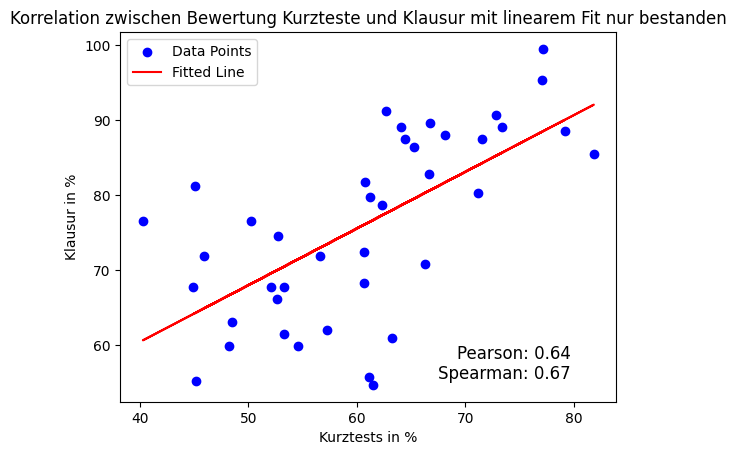

<Figure size 640x480 with 0 Axes>

In [ ]:
coefficients = np.polyfit(common_df_filtered["Bewertung"], common_df_filtered["Klausur %"], 1)

# The coefficients are in the form of [slope, intercept]
slope, intercept = coefficients

# Calculate the best fit line's y values
y_fit = slope * common_df_filtered["Bewertung"] + intercept

# Plotting the scatter plot
plt.scatter(common_df_filtered["Bewertung"], common_df_filtered["Klausur %"], color='blue', label='Data Points')

# Plotting the linear fit line
plt.plot(common_df_filtered["Bewertung"], y_fit, color='red', label='Fitted Line')

plt.xlabel('Kurztests in %')
plt.ylabel('Klausur in %')
plt.title('Korrelation zwischen Bewertung Kurzteste und Klausur mit linearem Fit nur bestanden')
plt.legend()
pearson_corr = common_df_filtered['Bewertung'].corr(common_df_filtered['Klausur %'], method='pearson')
print(f'Pearson correlation: {pearson_corr}')

spearman_corr = common_df_filtered['Bewertung'].corr(common_df_filtered['Klausur %'], method='spearman')
print(f'Spearman correlation: {spearman_corr}')

xlim = plt.xlim()
ylim = plt.ylim()

text_position_x = xlim[1] * 0.95  # 95% from the left
text_position_y = ylim[0] + (ylim[1] - ylim[0]) * 0.05  # 5% above the bottom

# Print correlation values on the plot
plt.text(text_position_x, text_position_y, f'Pearson: {pearson_corr:.2f}\nSpearman: {spearman_corr:.2f}', fontsize=12, horizontalalignment='right', verticalalignment='bottom')
#plt.text(text_position_x, text_position_y, f'Pearson: {pearson_corr:.2f}\nSpearman: {spearman_corr:.2f}', fontsize=12)

plt.show()
plt.savefig("corr_bestanden.png")